In [2]:
import pandas as pd

In [3]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [4]:
from nsepy import get_history as gh
import datetime as dt

In [5]:
start = dt.datetime(2022,1,1)
end = dt.datetime(2022,2,8)
stk_data = gh(symbol='ZOMATO',start=start,end=end)


In [6]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [7]:
stk_data

,Open,High,Low,Close
Date,,,,
2022-01-03,139.70,142.45,138.30,141.35
2022-01-04,141.35,141.55,137.60,138.35
2022-01-05,137.90,137.90,133.30,133.95
2022-01-06,133.00,133.15,129.60,130.00
2022-01-07,130.00,131.45,129.00,129.25
2022-01-10,130.50,130.90,129.40,130.20
2022-01-11,131.00,132.50,130.00,131.30
2022-01-12,132.10,132.90,131.60,132.25
2022-01-13,132.50,133.45,132.35,133.10


In [8]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (26, 1)


In [9]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [10]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

RMSE-Testset: 0.6214475303964415
maPe-Testset: 0.9615384615384616
RMSE-Testset: 0.38999495105228865
maPe-Testset: 38003496953632.46


C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE-Testset: 0.22646197675409474
maPe-Testset: 2713814904481.159
RMSE-Testset: 0.2268642010656019
maPe-Testset: 3264807457375.2627


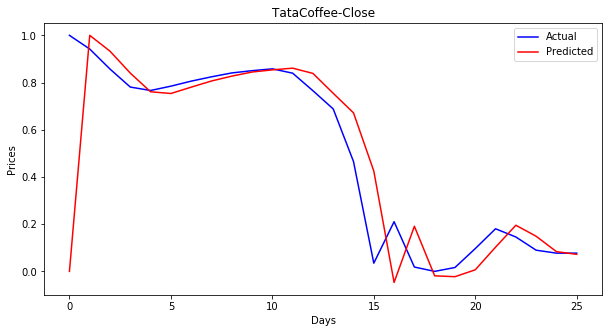

In [11]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [12]:
len(data1)

26

In [13]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [14]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

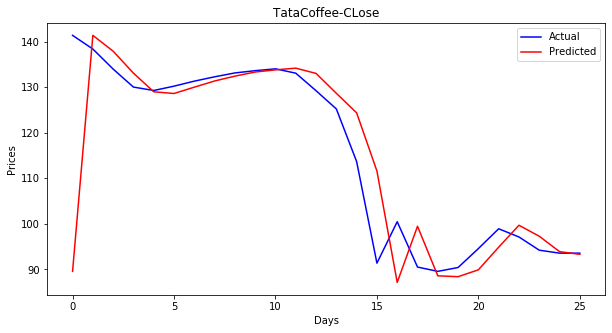

In [15]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [16]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 11.751565615198176
maPe-Testset: 0.049328294253669


In [17]:
forecast=model_fit.predict(len(data1), len(data1)+1)

In [18]:
forecast

array([0.07451323, 0.07268214])

In [19]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [20]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [21]:
forecast_stock_price_test_oriF

,Closefore
0,93.4098
1,93.3149


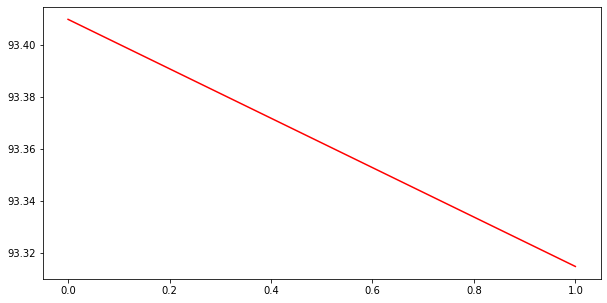

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")
